### Maps

Maps (aka. associative arrays) are the ADT in which unique keys `k` are mapped to their associated values `v` (e.g. map of country currencies).

_Think of the methods you would have in a `dict`._

#### Sorted Map

| Operation | Description |
| -- | -- |
| `myM.find_min()` | Get the key-value pair `(k, v)` with the minimum `k`. If `myM` is empty, return `None`. |
| `myM.find_max()` | Get the key-value pair `(k, v)` with the maximum `k`. If `myM` is empty, return `None`. |
| `myM.find_lt(k)` | Get the key-pair with the greatest key that is less than `k`. If there is no such item, return `None`. |
| `myM.find_le(k)` | Get the key-pair with the greatest key that is less than or equal to `k`. If there is no such item, return `None`. |
| `myM.find_gt(k)` | Get the key-pair with the smallest key that is greater than `k`. If there is no such item, return `None`. |
| `myM.find_ge(k)` | Get the key-pair with the smallest key that is greater than or equal to `k`. If there is no such item, return `None`. |
| `myM.find_range(k1, k2)` | Get all key-value pairs `(k, v)` that `k1 <= k <= k2`. If `k1` is `None`, it starts from the minimum key. If `k2` is None, it ends with the maximum key. |
| `iter(myM)` | All items of `myM` are iterated from the smallest to the biggest. |
| `reversed(myM)` | All keys in `myM` are iterated in reverse order. |

Each time it attempts to find the unique key, it has to loop the list to find the element with key `k`.

Below is the rough idea of the implementation:

| Operation | Description |
| -- | -- |
| `store (k,v)` | Store `(k, v)` in a doubly linked list |
| `get(k)` | Loop through the list until find the element with key `k` |
| `set(k,v)` | Create a new node `(k,v)` and add it at the front |
| `delete(k)` | Loop through the list until find the element with key `k`. Remove it by updating the pre and next elements. |

### Hash Table

Problem occurs when the key-value pairs are randomly stored in a map and time complexity is $O(n)$ to find the particular key. Simple solution is to use $k$ as index key of a table or lookup table such as hash table and time complexity to obtain the particular key-value is $O(1)$.

Idea of the problem through lookup table:

| Map | Hash Table |
| -- | -- |
| 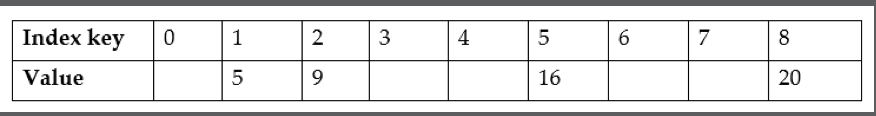 | 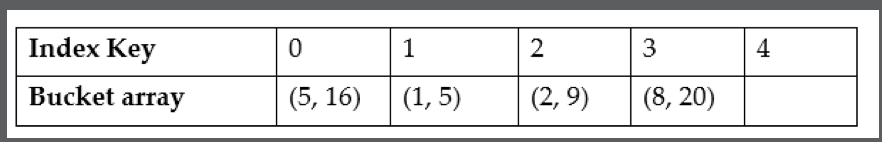 |

Notice how many redundancy are there in a `Map`? This can be easily resolved by using a hash function (e.g. $h(k) = k \text{mod} 5$ where `5` is the size of the table).

### Hashing function

Step1. Hash Code: an arbitrary object (`k`) → integer

An element is converted into an integer by using a hash function. This element can be used as an index to store the original element, which falls into the hash table.

```
hash = hashcode(key)
```

Step2. Compression: to the size of the table (`N` is the size of hash table)

The element is stored in the hash table where it can be quickly retrieved using hashed key, where the integer ranges from `0` to `N − 1`.

```
index = hash % array_size
```

Has to be deterministic, fast as $O(1)$, universal input, evenly distributed and randomly distributed.


### Hash Code

#### Bit Representation Hash Code

Since any arbitrary object $x$ can be represented using bits (use as many bits as hash code) - basically just use the bits as representation.

1. If the key is `115`, then its hash code is `115`.
2. If the key is `11.5`, then its hash code is its bit representation for the floating-point number `11.5` as an integer.
3. If a floating-point number uses 64-bit representation and e.g. Python only relies on 32-bit hash code, the high-order 32 bits or low-order 32 bits are its hash code. Since half of the key representation is ignored, it may cause more collisions.
    - One improved method is to add the high-order 32 bits with low-order 32 bits, or exclusive-or the high-order 32 bits with low-order 32 bits, and the result of 32 bits is used as its hash code (e.g. represent $x$ as $n$-tuple of `32`-bits such that $(x_1, x_2, ..., x_{n-1})$ and `x_1 ^ x_2 ^ ... ^ x_{n-1}`).
    
#### Polynomial Hash Code

Using a constant integer $a$ to calculate a result hash code such as,

$a^0 x_0 + a^1 x_1 + a^2 x_2 + ... + a^{n-1} x_{n - 1}$


#### Cyclic Hash Code

For bitwise, apply cyclic-shift function instead of multiplication (e.g. `shift(x, y)` means cyclic-shift `y` bits),

> From **`10110`**`001001110010100100111001011` to `001001110010100100111001011`**`10110`**

### Hash Compression functions

After the hash code, it needs to meet the size range of the bucket array (e.g. `0` to `N-1`).

#### Division Method

For any integer $i$ in hash code, and the size of a bucket array $N$, the division method as $i \text{mod} N$.

However when $N$ is not a prime number there might be high risk of collisions, therefore $N$ has to be selected well to be assigned so that the probability of collision is $\frac{1}{N}$.

It still cannot avoid collision if $p N + q$ for different $p$.

#### Multiply-Add-and-Divide (MAD) Method

Based on the above it does:

$[(ai + b) \text{mod} p] \text{mod} N$

Where $p$ is a prime number $p > N$, and random numbers $a \in [0, p - 1]$, $b \in [0, p - 1]$. It can achieve closer to a good hash function.

### Collision-Resolving Methods

What happens when $h(k_1) = h(k_2)$?


#### Closed addressing / Chaining (open hashing)

| | |
| -- | -- |
| 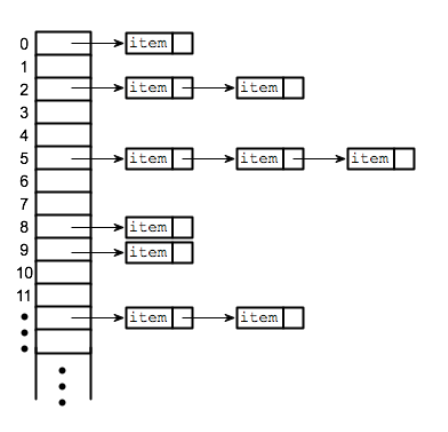 | 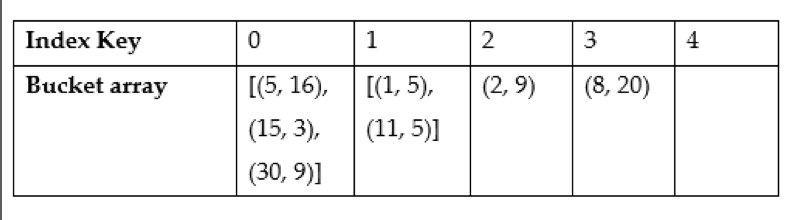 |


Each bucket is a list (or linked list). For $n$ items in a map and size of the bucket array as $N$ then $f$ is the load factor for the hash table where it shall be a small constant ideally $f \leq 1$.

**Flaws**: additional list data structure is used to store the items with collision keys. However, not all devices, especially mobile devices, have enough space to deal with the additional lists


#### Open addressing (closed hashing)

This is an alternative method by storing each item in a hash table slot to solve space issues in open hashing. The prerequisite for opening addressing is that the load factor $f \leq 0.5$. Examples are linear probing, quadratic probing and double probing.

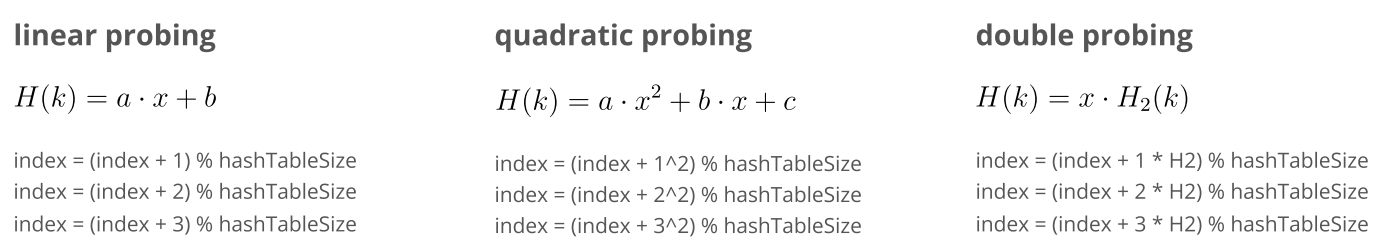

**Flaws**: Probing may go into cycles (an infinite loop) (hashing attack). Chaos when removing element from hash table.

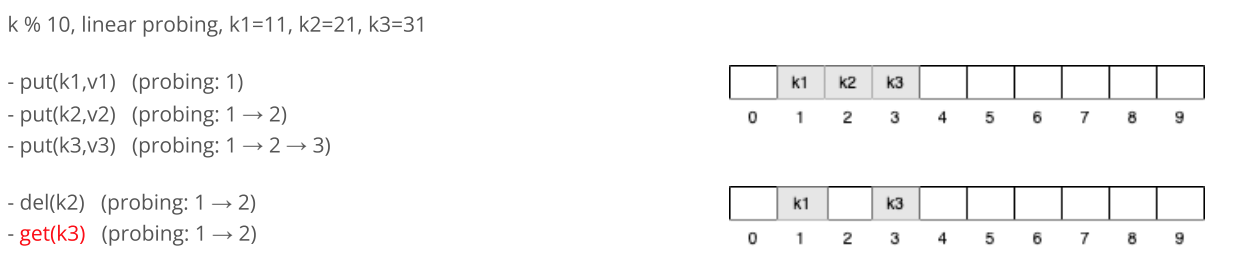


#### Resizing

Let,

- $M$: Total num of map elements
- $O$: Num of occupied buckets
- $N$: Size of hash table
- $P$: New size of hash table (expand or shrink)

This happens when for open addressing (load factor $\frac{O}{N}$) or closed addressing (tolerance factor $\frac{M}{N}$) exceeds or becomes unacceptable.

Re-hashing is done to assign the elements over.



In [10]:
import pandas as pd

arr = [22, 15, 42, 37, 69, 80, 9, 25, 58, 35]

In [22]:
def linear_probing(arr_, bucket_size, func_):
    m = [None for _ in range(bucket_size)]
    
    for i in arr_:
        h = func_(i)
        print(f"Hash for {i} = {h}")
        
        if m[h] is None:
            m[h] = i
        
        else:
            counter = 1

            while True:
                new_h = (h + counter) % bucket_size
                
                if m[new_h] is None:
                    print(f"--> Collision found. Mapped to {i} = {new_h}")
                    m[new_h] = i
                    break
                
                counter += 1
    
    return pd.DataFrame(m).fillna(" ").T
        
linear_probing(arr, 13, lambda i: (3*i + 7) % 13)

Hash for 22 = 8
Hash for 15 = 0
Hash for 42 = 3
Hash for 37 = 1
Hash for 69 = 6
Hash for 80 = 0
--> Collision found. Mapped to 80 = 2
Hash for 9 = 8
--> Collision found. Mapped to 9 = 9
Hash for 25 = 4
Hash for 58 = 12
Hash for 35 = 8
--> Collision found. Mapped to 35 = 10


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15.0,37.0,80.0,42.0,25.0,,69.0,,22.0,9.0,35.0,,58.0


In [23]:
def chaining(arr_, bucket_size, func_):
    m = [[] for _ in range(bucket_size)]
    
    for i in arr_:
        h = func_(i)
        print(f"Hash for {i} = {h}")
        m[h].append(i)
    
    return pd.DataFrame(m).fillna(" ").T

chaining(arr, 13, lambda i: (3*i + 7) % 13)

Hash for 22 = 8
Hash for 15 = 0
Hash for 42 = 3
Hash for 37 = 1
Hash for 69 = 6
Hash for 80 = 0
Hash for 9 = 8
Hash for 25 = 4
Hash for 58 = 12
Hash for 35 = 8


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15.0,37.0,,42.0,25.0,,69.0,,22.0,,,,58.0
1,80.0,,,,,,,,9.0,,,,
2,,,,,,,,,35.0,,,,


| Operation | Average | Worse | Best |
| -- | -- | -- | -- |
| Search | $O(1)$ | $O(1)$ | $O(n)$ |
| Insert | $O(1)$ | $O(1)$ | $O(n)$ |
| Delete | $O(1)$ | $O(1)$ | $O(n)$ |

### Skip List

| Searching a key | Deleting a key | Adding a key | |
| -- | -- | -- | -- |
| 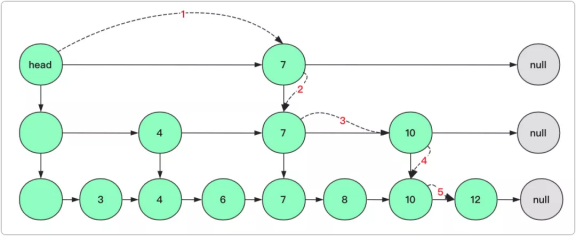 | 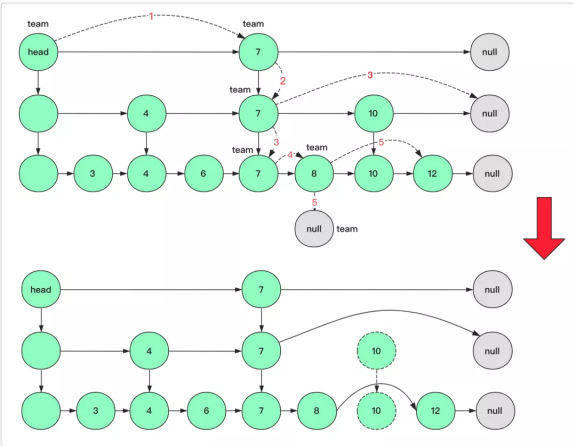 | 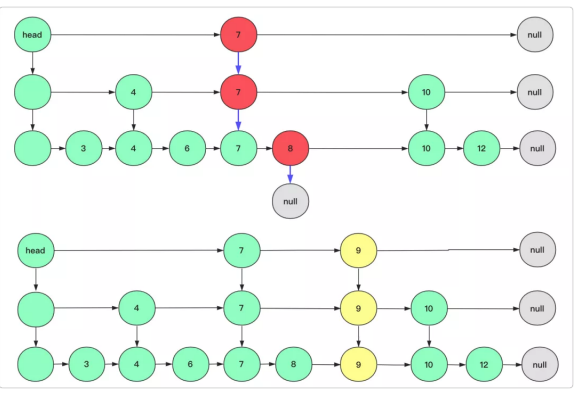  | 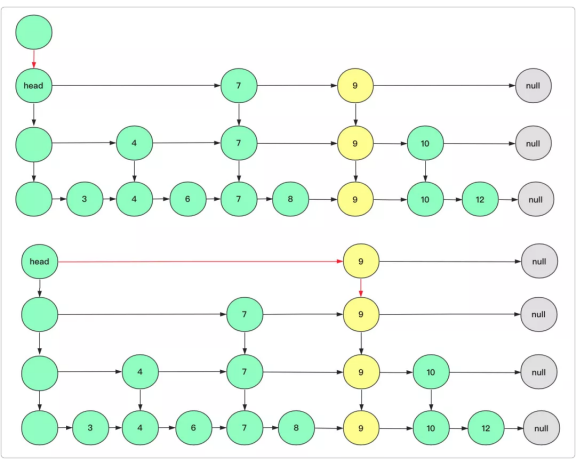 |

_**Why?**_ For example, the time complexity for a binary search algorithm with a sorted array is $O(\text{log}(n))$, but in the worst case adding or removing one element may take $O(n)$ time. The time complexity for all operation methods for the linked list with position list ADT is $O(1)$. However, fast search cannot be achieved with a standard list, and the time complexity to access a node in the worst case is $O(n)$.

Think of levels to skip indexes. For example during a **search in the skip list**:

1. Set the start position to left position in the topmost layer $S_h$ of the Skip List.
2. Drop Down: If `below(p)` is None, the position is at bottom layer $S_0$, stops; otherwise, we drop down to the next layer in the same tower by setting `p = below(p)`.
3. Scan Forward: More `p` forward in the current layer until the rightmost position such that `key(p) < k`.
4. Repeat steps 2 and 3 until the key is found.

For example during a **add in the skip list**:

1. Search the position to be inserted at level $S_0$.
2. Based on the randomisation result, we insert the same key to higher layers to build the tower.

For example during a **removal in the skip list**:

1. Search the position of key.
2. Delete the whole tower (e.g. remove the key from each linked list containing the key layer by layer).


| Operation | Description |
| -- | -- |
| `next(p)` | Get the position after `p` on the same level |
| `prev(p)` | Get the position before `p` on the same level |
| `above(p)` | Get the position above `p` in the same tower |
| `below(p)` | Get the position below `p` in the same tower |

Sorted Maps can be implemented by a Skip List,

| Operation | Description |
| -- | -- |
| `k in M` | Key Search. $O(\text{log}(n))$ expected. |
| `M[k] = v` | Insert a key. $O(\text{log}(n))$ expected. |
| `del M[k]` | Delete a key. $O(\text{log}(n))$ expected. |

| Operation | Linked List | Skip List |
| -- | -- | -- |
| Search | $O(n)$ | $O(\text{log}(n))$ | 
| Insert | $O(n)$ | $O(\text{log}(n))$ | 
| Delete | $O(n)$ | $O(\text{log}(n))$ | 

### TMA01 Answers

#### Question 5b

A hash code is used to convert non-numeric keys to integers. One possible hash code for the country names is the string length; the other one is summing up the ascii values of all characters. Analyse which one would be a better hash code? Explain your answer.

_**“Summing up the ascii values of all characters”**_ is a better hash code than _**“the string
length”**_ of the countries. In order to avoid the hash collision, the hash code should _avoid to encode the different inputs to same output_. The string length for countries are ranging from `4` to around `30`, for example, `"Spain"` and `"Italy"` have the string length of `5`. _**“Summing up the ascii values of all characters”**_ gives a much wider range, thus it is a better choice.

#### Question 5e

List the two categories of collision resolving methods. What is the load factor for a hash table? If the load factor is greater than 0.5, which collision resolving method is better? Explain your answer.

The two categories of collision resolving methods are

1. Chaining, by storing the key-value pairs with same key hash value into a list.
2. Open addressing, by storing each item in the next available hash table slot.

The load factor is defined as $n/N$ assuming there are $n$ items in a map and the size of bucket array is $N$. If the load factor is greater than $0.5$, a better method is “chaining”, as it would cost a lot of probing for open addressing once the hash table slots are heavily occupied.

#### Question 7a

Show the operations of adding these items in the skip list,

| Value | Depth |
| -- | -- |
| 5 | 2 |
| 20 | 0 |
| 30 | 0 |
| 2 | 0 |
| 26 | 3 |
| 31 | 1 |

| | | | | | |
| -- | -- | -- | -- | -- | -- |
| 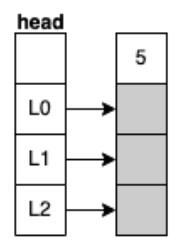 | 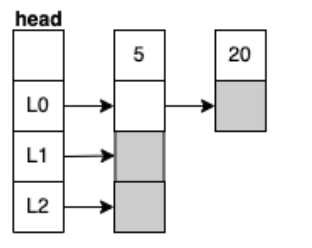 | 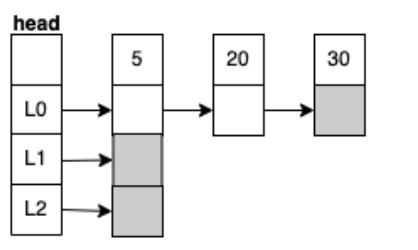 | 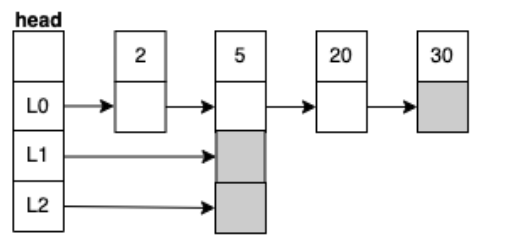 | 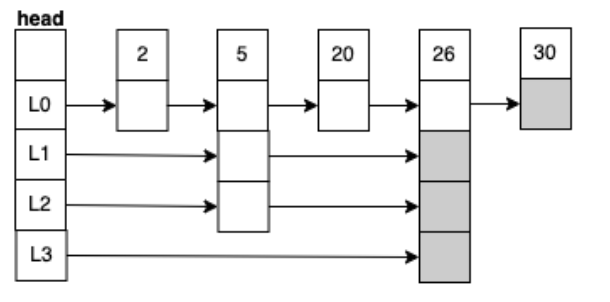 | 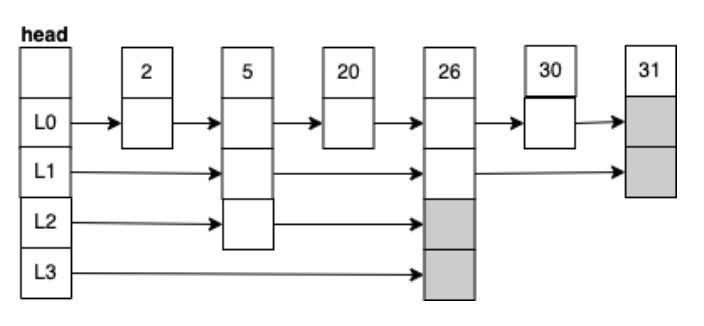 | 

#### Question 7b

Based on the above pointers design, complete the implementation of Skip List class below by providing methods of find, insert, and delete:

In [39]:
import random

class SkipListNode:
    
    def __init__(self, data = None):
        self.data = data
        self.pointers = []

class SkipList:

    MAX_LEVEL = 16

    def __init__(self):
        self.head = SkipListNode()
        self.head.pointers = [None] * type(self).MAX_LEVEL
        self.levels = 1

    def find(self, val):
        cur = self.head
        
        for i in range(self.levels - 1, -1, -1):
            while cur.pointers[i] and cur.pointers[i].data < val:
                cur = cur.pointers[i]
                
        if cur.pointers[0] and cur.pointers[0].data == val:
            return cur.pointers[0]

        return None
    
    def insert(self, val):
        levels = 1

        while random.randint(0, 2) and levels < type(self).MAX_LEVEL:
            levels += 1
        
        if self.levels < levels:
            self.levels = levels

        node = SkipListNode(val)
        node.pointers = [None] * levels
        update = [self.head] * levels
        cur = self.head

        for i in range(levels - 1, -1, -1):
            while cur.pointers[i] and cur.pointers[i].data < val:
                cur = cur.pointers[i]
            update[i] = cur
        
        for i in range(levels):
            node.pointers[i] = update[i].pointers[i]
            update[i].pointers[i] = node
        
        
    def delete(self, val):
        update = [None] * self.levels
        cur = self.head
        
        for i in range(self.levels - 1, -1, -1):
            while cur.pointers[i] and cur.pointers[i].data < val:
                cur = cur.pointers[i]
            update[i] = cur
        
        if cur.pointers[0] and cur.pointers[0].data == val:
            for i in range(self.levels - 1, -1, -1):
                if update[i].pointers[i] and update[i].pointers[i].data == val:
                    update[i].pointers[i] = update[i].pointers[i].pointers[i]

    def print_me(self):
        print("skip list: %d levels" % self.levels)

        for i in range(self.levels):
            print("Level {}: ".format(i), end=" ")
            print("head", end="→")

            node = self.head.pointers[i]

            while node is not None:
                print(node.data, end="→")
                node = node.pointers[i]

            print('null')

skl = SkipList()
skl.insert(1000)

for i in range(9):
    skl.insert(random.randint(0, 1000))

skl.print_me()

print("1000 found: ", not skl.find(1000) is None)

skl.delete(1000)
skl.print_me()

print("1000 found: ", not skl.find(1000) is None)

skip list: 7 levels
Level 0:  head→62→315→436→465→621→671→735→794→801→1000→null
Level 1:  head→315→436→465→621→794→801→null
Level 2:  head→436→465→621→801→null
Level 3:  head→436→621→801→null
Level 4:  head→436→null
Level 5:  head→436→null
Level 6:  head→436→null
1000 found:  True
skip list: 7 levels
Level 0:  head→62→315→436→465→621→671→735→794→801→null
Level 1:  head→315→436→465→621→794→801→null
Level 2:  head→436→465→621→801→null
Level 3:  head→436→621→801→null
Level 4:  head→436→null
Level 5:  head→436→null
Level 6:  head→436→null
1000 found:  False
